In [1]:
import xarray
import numpy as np
import pandas
import h5py
import datetime
from ulmo.utils import image_utils
from ulmo.plotting import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os

/Users/rachelstumpf/ulmo/ulmo/utils/image_utils.py:8: UserWarning: healpy not installed.  Not all functions will work!
  warnings.warn("healpy not installed.  Not all functions will work!")


In [2]:
# SST_L3S_VIIRS table
# this contains instructions for what cutouts to create: it matches the VIIRS to L3S

l3s = pandas.read_parquet('/Users/rachelstumpf/SST_L3S_VIIRS.parquet')

In [3]:
gd_date = l3s.datetime <= pandas.Timestamp(datetime.datetime(2012, 2, 2))
df = l3s[gd_date]
df['datetime']

0      2012-01-31 13:42:26
1      2012-01-31 13:44:47
2      2012-01-31 13:49:19
3      2012-01-31 13:46:48
4      2012-01-31 13:44:00
               ...        
1809   2012-02-01 14:24:56
1810   2012-02-01 14:20:56
1811   2012-02-01 14:23:53
1812   2012-02-01 14:19:50
1813   2012-02-01 13:52:44
Name: datetime, Length: 1364, dtype: datetime64[ns]

In [4]:
pandas.set_option('display.max_colwidth', None)
# l3s.sort_values('datetime', ascending=True)[['datetime', 'ex_filename']]

In [5]:
l3s[['VIIRS_datetime', 'lon', 'datetime']]

,VIIRS_datetime,lon,datetime
0,2012-02-01 00:10:00,-176.892460,2012-01-31 13:42:26
1,2012-02-01 00:10:00,-176.305300,2012-01-31 13:44:47
2,2012-02-01 00:10:00,-175.170240,2012-01-31 13:49:19
3,2012-02-01 00:10:00,-175.801420,2012-01-31 13:46:48
4,2012-02-01 00:10:00,-176.500980,2012-01-31 13:44:00
...,...,...,...
2932447,2020-12-31 22:50:00,-142.909970,2020-12-30 15:58:22
2932448,2020-12-31 22:50:00,-149.027340,2020-12-30 15:33:53
2932449,2020-12-31 22:50:00,-149.160080,2020-12-30 15:33:22
2932450,2020-12-31 23:30:00,39.833706,2020-12-31 04:09:20


In [6]:
# tmp.parquet
# this is the temporary table that contains extracted info about each cutout 
# (basically the updated version of the L3S table)

tmp = pandas.read_parquet('/Users/rachelstumpf/ulmo/ulmo/runs/L3S/vet/tmp.parquet')

In [7]:
# tst.h5
# this is the extraction files. 'valid' is the temp arrays, 'valid_metadata' is the associated things to keep track of

file_path = '/Users/rachelstumpf/tst.h5'
with h5py.File(file_path, 'r') as h5_file:
    dataset = h5_file['valid']
    first_observation = dataset[0]

In [8]:
# keep only dates that are before or on 02-02-2012

gd_date = l3s.datetime <= datetime.datetime(2012,2,2)
l3s_table = l3s[gd_date]

l3s_table[['VIIRS_datetime', 'datetime', 'ex_filename']]

,VIIRS_datetime,datetime,ex_filename
0,2012-02-01 00:10:00,2012-01-31 13:42:26,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/032/20120201120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
1,2012-02-01 00:10:00,2012-01-31 13:44:47,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/032/20120201120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
2,2012-02-01 00:10:00,2012-01-31 13:49:19,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/032/20120201120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
3,2012-02-01 00:10:00,2012-01-31 13:46:48,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/032/20120201120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
4,2012-02-01 00:10:00,2012-01-31 13:44:00,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/032/20120201120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
...,...,...,...
1809,2012-02-02 23:40:00,2012-02-01 14:24:56,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/033/20120202120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
1810,2012-02-02 23:40:00,2012-02-01 14:20:56,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/033/20120202120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
1811,2012-02-02 23:40:00,2012-02-01 14:23:53,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/033/20120202120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc
1812,2012-02-02 23:40:00,2012-02-01 14:19:50,/Volumes/Aqua-1/Hackathon/daily/l3s_fields/2012/033/20120202120000-STAR-L3S_GHRSST-SSTsubskin-LEO_Daily-ACSPO_V2.80-v02.0-fv01.0.nc


In [9]:
# oh nevermind this is okay because they were all subtracted from 1:30am. So if we were setting
# each L3S cutout to be at 1:30 am, a lot of them would be shifted to an earlier day. I don't understand
# why we have no cutouts from 02-02-2012, unless they're out of order

l3s_table.sort_values('VIIRS_datetime')[['VIIRS_datetime', 'lon', 'datetime']]

# this makes sense, very low longitudes will be shifted earlier the most
# so there must just be a handicap with keeping observations on 02-02, since a lot of longitudes shift it to 02-01
# so why are there 1364 rows, but indexes from 0 to 1813??

,VIIRS_datetime,lon,datetime
0,2012-02-01 00:10:00,-176.89246,2012-01-31 13:42:26
18,2012-02-01 00:10:00,-169.23978,2012-01-31 14:13:02
17,2012-02-01 00:10:00,-169.06831,2012-01-31 14:13:44
16,2012-02-01 00:10:00,-168.31488,2012-01-31 14:16:44
15,2012-02-01 00:10:00,-168.89798,2012-01-31 14:14:24
...,...,...,...
1787,2012-02-02 23:40:00,-172.35194,2012-02-01 14:00:36
1786,2012-02-02 23:40:00,-172.05122,2012-02-01 14:01:48
1812,2012-02-02 23:40:00,-167.54140,2012-02-01 14:19:50
1797,2012-02-02 23:40:00,-175.37512,2012-02-01 13:48:30


In [10]:
# filter a new way and see if it gets same number of observations

l3s['date'] = pandas.to_datetime(l3s['datetime'])
l3s['date'] = l3s['date'].dt.date
l3s['date']

# Create a list of target dates
target_dates = pandas.to_datetime(['2012-01-31', '2012-02-01', '2012-02-02']).date

# Select rows where the date is in the target_dates list
selected_rows = l3s[l3s['date'].isin(target_dates)]

In [11]:
# selected_rows
# it did not... for some reason now there's 2215 observations on or before 02-02-2012

In [12]:
# try doing it where VIIRS_datetime and datetime must be on or before 02-02-2012

l3s['date'] = pandas.to_datetime(l3s['datetime'])
l3s['date'] = l3s['date'].dt.date
l3s['viirs_date'] = pandas.to_datetime(l3s['VIIRS_datetime'])
l3s['viirs_date'] = l3s['VIIRS_datetime'].dt.date

# Create a list of target dates
target_dates = pandas.to_datetime(['2012-01-31', '2012-02-01', '2012-02-02']).date

# Select rows where the date is in the target_dates list
subset = l3s[l3s['date'].isin(target_dates)]
subset2 = l3s[l3s['viirs_date'].isin(target_dates)]

In [13]:
# subset # there are 2215 L3S with before or on 02-02-2012
# subset2 # ahha! there are 1814 L3S AND viirs that are both on or before 02-02-2012
# but these go from index 0 to 1813
# WHERE IS THE 1364/1363 coming from ? 

In [14]:
# currently, l3s_table should be a section of subset2, examine what rows were not included in the l3s_table
# there should be 1814-1364 = 450

subset3 = subset2.drop(['viirs_date', 'date'], axis=1)
merged = subset3.merge(l3s_table, how='left', indicator=True)

rows_not_in_l3s_table = merged[merged['_merge'] == 'left_only']

In [15]:
pandas.set_option('display.max_rows', None)
# okay, there are 450, that's what we want to see, now what is special about them

rows_not_in_l3s_table[['VIIRS_datetime', 'lon', 'datetime']]

# 821-1341, 1470, 1583-1740, 1761-1770
# they are all observations where both VIIRS_datetime and datetime are on 2012-02-02,
# I wonder if the selection was that one of the them needs to be on or before and the other needs to be before
# either way, this probably isn't a huge issue bc when we actually do extraction it will be all observations

,VIIRS_datetime,lon,datetime
821,2012-02-02 00:20:00,46.846268,2012-02-02 04:37:23
822,2012-02-02 00:20:00,43.931595,2012-02-02 04:25:44
823,2012-02-02 00:20:00,42.944363,2012-02-02 04:21:47
824,2012-02-02 00:20:00,40.195263,2012-02-02 04:10:47
825,2012-02-02 00:20:00,42.008640,2012-02-02 04:18:02
826,2012-02-02 00:20:00,39.345270,2012-02-02 04:07:23
827,2012-02-02 00:20:00,36.728000,2012-02-02 03:56:55
828,2012-02-02 00:20:00,38.536850,2012-02-02 04:04:09
829,2012-02-02 00:30:00,12.877603,2012-02-02 02:21:31
830,2012-02-02 00:30:00,13.872723,2012-02-02 02:25:29


In [16]:
# need to find the row that is in tmp.parquet and L3S_table, but not h5

pandas.reset_option('display.max_rows')
file_path = '/Users/rachelstumpf/tst.h5'
with h5py.File(file_path, 'r+') as h5_file:
    column_names = list(tmp.columns)
    target_dataset = h5_file['valid_metadata']
    df = pandas.DataFrame(target_dataset[:]).applymap(lambda x: x.decode() if isinstance(x, bytes) else x)

    df.columns = column_names

    # display(df)


In [17]:
# find row that is missing from df

tmp['VIIRS_UID'] = tmp['VIIRS_UID'].astype('int64')
df['VIIRS_UID'] = df['VIIRS_UID'].astype('int64')
tmp_viirs_uid = tmp['VIIRS_UID']

tmp_other_cols = tmp.drop('VIIRS_UID', axis=1)

df_viirs_uid = df['VIIRS_UID']
df_other_cols = df.drop('VIIRS_UID', axis=1)

merged_viirs_uid = pandas.concat([tmp_viirs_uid, df_viirs_uid], axis=0)
merged_other_cols = pandas.concat([tmp_other_cols, df_other_cols], axis=0)

merged = pandas.concat([merged_viirs_uid, merged_other_cols], axis=1)

rows_not_in_df = tmp[~tmp['VIIRS_UID'].isin(df['VIIRS_UID'])]

rows_not_in_df

,VIIRS_row,VIIRS_col,VIIRS_UID,VIIRS_LL,VIIRS_pp_file,VIIRS_pp_idx,VIIRS_T90,VIIRS_T10,VIIRS_DT,VIIRS_pp_type,...,pp_root,field_size,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,clear_fraction
1363,3792,2016,13281431436568436,561.341797,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5,428893,2.869995,2.51001,0.359985,0,...,l3s_viirs,64,91,0,276.113251,275.630005,276.699982,276.359985,275.949982,0.911621


In [18]:
tmp.iloc[1363] # the final row of tmp is the one that isn't in h5
df[df['VIIRS_UID'] == 13281431436568436] # does not exist in df 

,VIIRS_row,VIIRS_col,VIIRS_UID,VIIRS_LL,VIIRS_pp_file,VIIRS_pp_idx,VIIRS_T90,VIIRS_T10,VIIRS_DT,VIIRS_pp_type,...,pp_root,field_size,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,clear_fraction


In [19]:
tmp.iloc[1363][['VIIRS_datetime', 'lon', 'datetime']]

VIIRS_datetime    2012-02-02 23:40:00
lon                        -174.31564
datetime          2012-02-01 13:52:44
Name: 1363, dtype: object

In [20]:
# still don't know where the 1363/1364 is coming from
# maybe this is observations that are before or on 02-02-2012 in VIIRS but before 02-02-2012 in L3S

l3s['date'] = pandas.to_datetime(l3s['datetime'])
l3s['date'] = l3s['date'].dt.date
l3s['viirs_date'] = pandas.to_datetime(l3s['viirs_date'])
l3s['viirs_date'] = l3s['viirs_date'].dt.date

target_dates_viirs = pandas.to_datetime(['2012-01-31', '2012-02-01', '2012-02-02']).date
target_dates_l3s = pandas.to_datetime(['2012-01-31', '2012-02-01']).date

selected_rows = l3s[l3s['date'].isin(target_dates_l3s)]
selected_rows = selected_rows[selected_rows['viirs_date'].isin(target_dates_viirs)]

In [21]:
# work on that missing observation
# plot cloud cover and DT

tmp['T10'] = tmp['T10'] - 273.15
tmp['T90'] = tmp['T90'] - 273.15
tmp['DT'] = tmp['T90'] - tmp['T10']

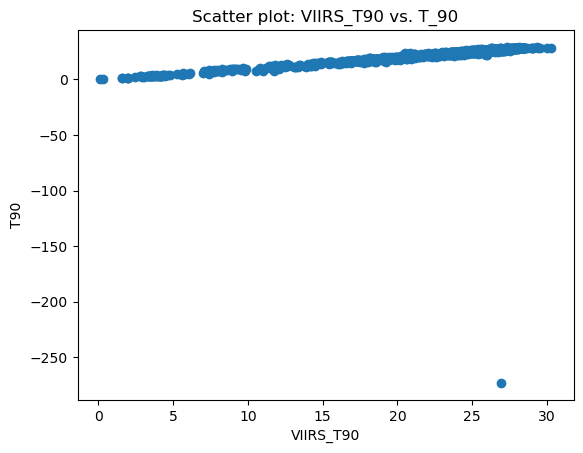

In [22]:
# plotting DT

plt.scatter(tmp['VIIRS_T90'], tmp['T90'])
plt.xlabel('VIIRS_T90')
plt.ylabel('T90')
plt.title('Scatter plot: VIIRS_T90 vs. T_90')
plt.show()

In [23]:
tmp.sort_values('T90', ascending=True)[['T90', 'VIIRS_T90','VIIRS_UID']]

,T90,VIIRS_T90,VIIRS_UID
27,-273.150000,26.950012,1328102862635982285
336,-0.079993,0.119995,13282442934294131
201,0.070001,0.320007,13282199753487854
1325,0.839990,1.989990,13283118302922600
1324,0.859979,1.559998,13283064533232266
...,...,...,...
200,28.489984,28.519989,132810430958162810
1249,28.549982,26.920013,132810812817456252
1241,28.760004,27.320007,132810750157471347
1232,28.760004,28.149994,132810687497486330


In [24]:
tmp[tmp['VIIRS_UID'] == 1328102862635982285]

,VIIRS_row,VIIRS_col,VIIRS_UID,VIIRS_LL,VIIRS_pp_file,VIIRS_pp_idx,VIIRS_T90,VIIRS_T10,VIIRS_DT,VIIRS_pp_type,...,field_size,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,clear_fraction,DT
27,2352,384,1328102862635982285,628.024536,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5,466057,26.950012,26.600006,0.350006,0,...,64,-1,-1,0.0,0.0,0.0,-273.15,-273.15,0.0,0.0


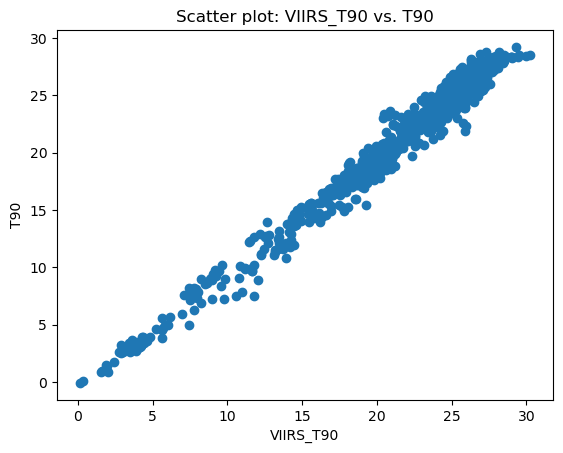

In [25]:
tmp2 = tmp.drop(tmp[tmp['VIIRS_UID'] == 1328102862635982285].index)
plt.scatter(tmp2['VIIRS_T90'], tmp2['T90'])
plt.xlabel('VIIRS_T90')
plt.ylabel('T90')
plt.title('Scatter plot: VIIRS_T90 vs. T90')
plt.show()

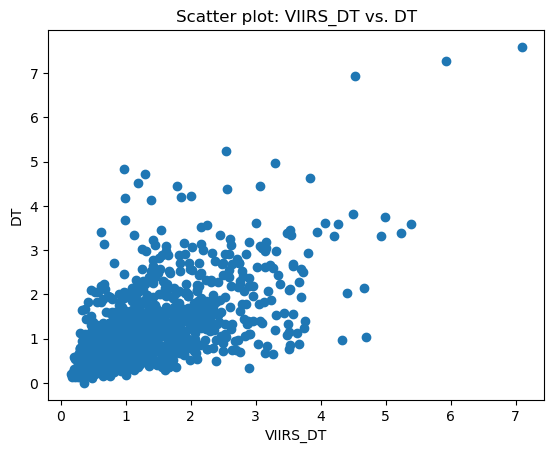

In [26]:
plt.scatter(tmp['VIIRS_DT'], tmp['DT'])
plt.xlabel('VIIRS_DT')
plt.ylabel('DT')
plt.title('Scatter plot: VIIRS_DT vs. DT')
plt.show()

In [27]:
# plot matching cutouts

# df is currently h5 metadata
# use VIIRS_UID 13282199753487854

pp_file = "s3://sst-l3s/PreProc/tst.h5"
pp_idx = 1099

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
L3S_row0 = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/tst.h5")
L3S_row0 = np.flipud(np.fliplr(L3S_row0))[0,...]

# get mathcing VIIRS
pp_file = "s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5"
pp_idx = 198110 # these cannot be simply read into the function because now they start with VIIRS_ so do not match

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
VIIRS_row0 = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5")
VIIRS_row0 = VIIRS_row0[0,...]

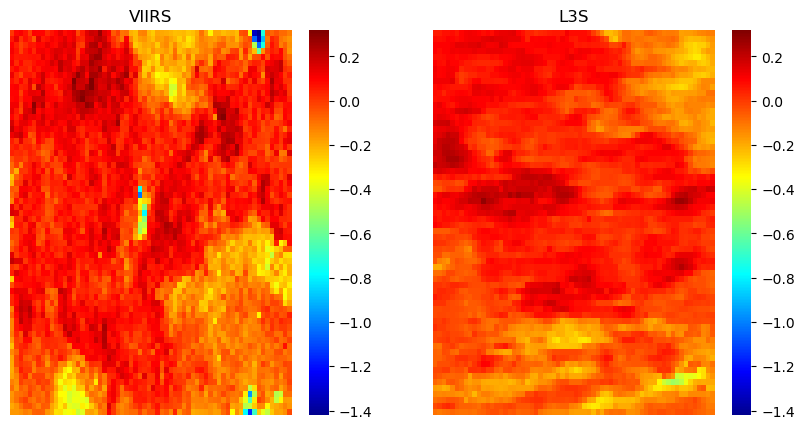

In [28]:
def show_image(img: np.ndarray, cm=None, cbar: bool = True, flipud=True,
               vmnx=(None, None), show=False, set_aspect=None, clbl=None,
               ax=None, title=None):
    """Display the cutout image
    Args:
        img (np.ndarray): cutout image
        cm ([type], optional): Color map to use. Defaults to None.
            If None, load the heatmap above
        cbar (bool, optional): If True, show a color bar. Defaults to True.
        flipud (bool, optional): If True, flip the image up/down. Defaults to True.
        vmnx (tuple, optional): Set vmin, vmax. Defaults to None
        set_aspect (str, optional):
            Passed to ax.set_aspect() if provided
        ax (matplotlib.Axis, optional): axis to use for the plot
        title (str, optional): title for the plot
    Returns:
        matplotlib.Axis: axis containing the plot
    """
    if cm is None:
        _, cm = plotting.load_palette()
    #
    ax = sns.heatmap(np.flipud(img), xticklabels=[],
                     vmin=vmnx[0], vmax=vmnx[1], ax=ax,
                     yticklabels=[], cmap=cm, cbar=cbar,
                     cbar_kws={'label': clbl})  # 'fontsize': 20})
    # Set the title
    if title is not None:
        ax.set_title(title)

    if show:
        plt.show()
    if set_aspect is not None:
        ax.set_aspect(set_aspect)
    #
    return ax

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Calculate the minimum and maximum values for both images
viirs_min = np.min(VIIRS_row0)
viirs_max = np.max(VIIRS_row0)
l3s_min = np.min(L3S_row0[0])
l3s_max = np.max(L3S_row0[0])

# Use the same vmin and vmax for both images
vmnx = (min(viirs_min, l3s_min), max(viirs_max, l3s_max))

show_image(VIIRS_row0, ax=axes[0], title='VIIRS', vmnx=vmnx)

show_image(L3S_row0, ax=axes[1], title='L3S', vmnx=vmnx)

plt.show()

In [29]:
random_row = df.sample(n=1)
random_row

,VIIRS_row,VIIRS_col,VIIRS_UID,VIIRS_LL,VIIRS_pp_file,VIIRS_pp_idx,VIIRS_T90,VIIRS_T10,VIIRS_DT,VIIRS_pp_type,...,pp_root,field_size,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,clear_fraction
695,1776,2016,132835855723539201,101.14410400390625,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5,851826,4.3599853515625,3.079986572265625,1.279998779296875,0,...,l3s_viirs,64,47,0,276.5061340332031,274.6300048828125,278.0199890136719,277.0299987792969,276.1300048828125,1.0


In [30]:
# generalize this so it selects directly from table and inputs equivalent values

pp_file = random_row['pp_file'].str.extract(r'(s3://.+\.h5)').iloc[0, 0]
pp_idx = int(random_row['pp_idx'].iloc[0])

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
L3S_row0 = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/tst.h5")
#L3S_row0 = np.flipud(np.fliplr(L3S_row0))[0,...]
L3S_row0 = np.fliplr(np.flipud(L3S_row0))[0,...]

# get mathcing VIIRS
pp_file = random_row['VIIRS_pp_file'].str.extract(r'(s3://.+\.h5)').iloc[0, 0]
pp_idx = int(random_row['VIIRS_pp_idx'].iloc[0])

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
VIIRS_row0 = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5")
VIIRS_row0 = VIIRS_row0[0,...]

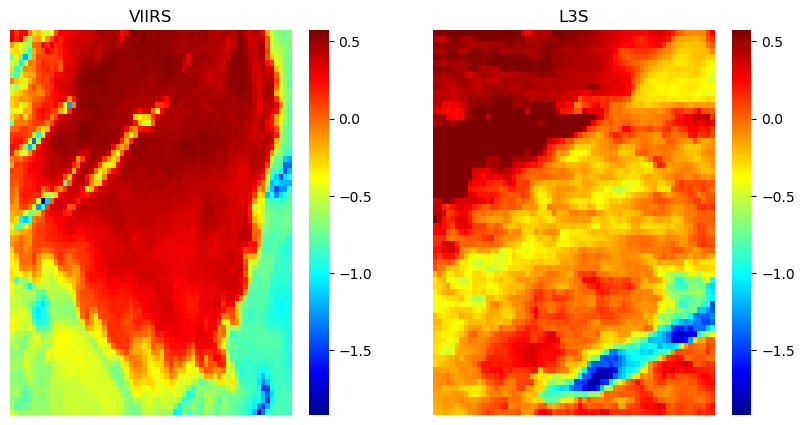

In [31]:
def show_image(img: np.ndarray, cm=None, cbar: bool = True, flipud=True,
               vmnx=(None, None), show=False, set_aspect=None, clbl=None,
               ax=None, title=None):
    """Display the cutout image
    Args:
        img (np.ndarray): cutout image
        cm ([type], optional): Color map to use. Defaults to None.
            If None, load the heatmap above
        cbar (bool, optional): If True, show a color bar. Defaults to True.
        flipud (bool, optional): If True, flip the image up/down. Defaults to True.
        vmnx (tuple, optional): Set vmin, vmax. Defaults to None
        set_aspect (str, optional):
            Passed to ax.set_aspect() if provided
        ax (matplotlib.Axis, optional): axis to use for the plot
        title (str, optional): title for the plot
    Returns:
        matplotlib.Axis: axis containing the plot
    """
    if cm is None:
        _, cm = plotting.load_palette()
    #
    ax = sns.heatmap(np.flipud(img), xticklabels=[],
                     vmin=vmnx[0], vmax=vmnx[1], ax=ax,
                     yticklabels=[], cmap=cm, cbar=cbar,
                     cbar_kws={'label': clbl})  # 'fontsize': 20})
    # Set the title
    if title is not None:
        ax.set_title(title)

    if show:
        plt.show()
    if set_aspect is not None:
        ax.set_aspect(set_aspect)
    #
    return ax

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Calculate the minimum and maximum values for both images
viirs_min = np.min(VIIRS_row0)
viirs_max = np.max(VIIRS_row0)
l3s_min = np.min(L3S_row0[0])
l3s_max = np.max(L3S_row0[0])

# Use the same vmin and vmax for both images
vmnx = (min(viirs_min, l3s_min), max(viirs_max, l3s_max))

show_image(VIIRS_row0, ax=axes[0], title='VIIRS', vmnx=vmnx)

show_image(L3S_row0, ax=axes[1], title='L3S', vmnx=vmnx)

plt.show()

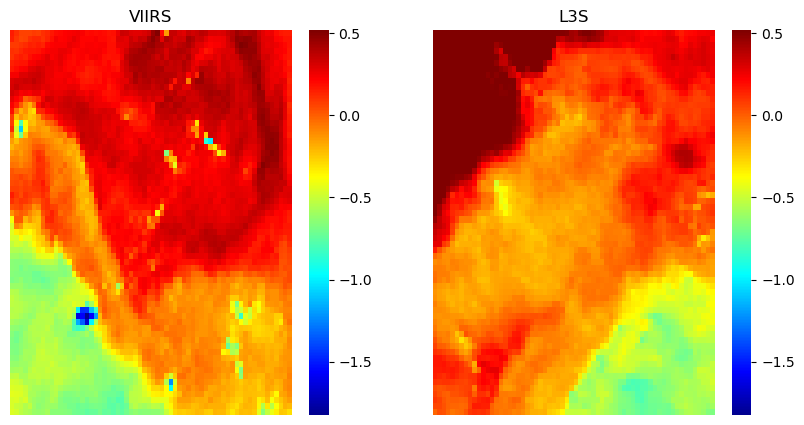

In [32]:
random_row = df.sample(n=1)
pp_file = random_row['pp_file'].str.extract(r'(s3://.+\.h5)').iloc[0, 0]
pp_idx = int(random_row['pp_idx'].iloc[0])

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
L3S_row0 = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/tst.h5")
#L3S_row0 = np.flipud(np.fliplr(L3S_row0))[0,...]
L3S_row0 = np.fliplr(np.flipud(L3S_row0))[0,...]

# get mathcing VIIRS
pp_file = random_row['VIIRS_pp_file'].str.extract(r'(s3://.+\.h5)').iloc[0, 0]
pp_idx = int(random_row['VIIRS_pp_idx'].iloc[0])

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
VIIRS_row0 = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5")
VIIRS_row0 = VIIRS_row0[0,...]
def show_image(img: np.ndarray, cm=None, cbar: bool = True, flipud=True,
               vmnx=(None, None), show=False, set_aspect=None, clbl=None,
               ax=None, title=None):
    """Display the cutout image
    Args:
        img (np.ndarray): cutout image
        cm ([type], optional): Color map to use. Defaults to None.
            If None, load the heatmap above
        cbar (bool, optional): If True, show a color bar. Defaults to True.
        flipud (bool, optional): If True, flip the image up/down. Defaults to True.
        vmnx (tuple, optional): Set vmin, vmax. Defaults to None
        set_aspect (str, optional):
            Passed to ax.set_aspect() if provided
        ax (matplotlib.Axis, optional): axis to use for the plot
        title (str, optional): title for the plot
    Returns:
        matplotlib.Axis: axis containing the plot
    """
    if cm is None:
        _, cm = plotting.load_palette()
    #
    ax = sns.heatmap(np.flipud(img), xticklabels=[],
                     vmin=vmnx[0], vmax=vmnx[1], ax=ax,
                     yticklabels=[], cmap=cm, cbar=cbar,
                     cbar_kws={'label': clbl})  # 'fontsize': 20})
    # Set the title
    if title is not None:
        ax.set_title(title)

    if show:
        plt.show()
    if set_aspect is not None:
        ax.set_aspect(set_aspect)
    #
    return ax

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Calculate the minimum and maximum values for both images
viirs_min = np.min(VIIRS_row0)
viirs_max = np.max(VIIRS_row0)
l3s_min = np.min(L3S_row0[0])
l3s_max = np.max(L3S_row0[0])

# Use the same vmin and vmax for both images
vmnx = (min(viirs_min, l3s_min), max(viirs_max, l3s_max))

show_image(VIIRS_row0, ax=axes[0], title='VIIRS', vmnx=vmnx)

show_image(L3S_row0, ax=axes[1], title='L3S', vmnx=vmnx)

plt.show()

In [33]:
random_row

,VIIRS_row,VIIRS_col,VIIRS_UID,VIIRS_LL,VIIRS_pp_file,VIIRS_pp_idx,VIIRS_T90,VIIRS_T10,VIIRS_DT,VIIRS_pp_type,...,pp_root,field_size,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,clear_fraction
662,3600,1728,132858665013531612,243.72119140625,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5,480322,24.639984130859375,23.709991455078125,0.92999267578125,0,...,l3s_viirs,64,890,0,296.2730712890625,295.47998046875,297.3699951171875,296.82000732421875,295.7799987792969,0.999755859375


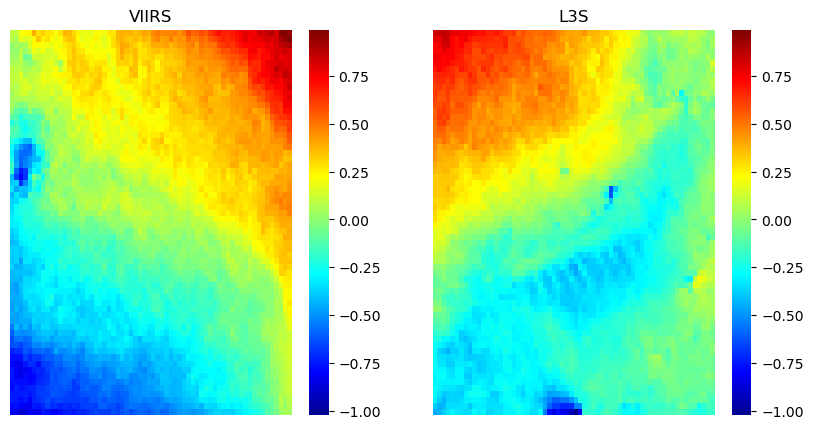

In [34]:
random_row = df.loc[df['VIIRS_UID'] == 13289236775686725]
pp_file = random_row['pp_file'].str.extract(r'(s3://.+\.h5)').iloc[0, 0]
pp_idx = int(random_row['pp_idx'].iloc[0])

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
L3S_row0 = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/tst.h5")
L3S_row0 = np.flipud(np.fliplr(L3S_row0))[0,...]

# get mathcing VIIRS
pp_file = random_row['VIIRS_pp_file'].str.extract(r'(s3://.+\.h5)').iloc[0, 0]
pp_idx = int(random_row['VIIRS_pp_idx'].iloc[0])

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
VIIRS_row0 = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5")
VIIRS_row0 = VIIRS_row0[0,...]
def show_image(img: np.ndarray, cm=None, cbar: bool = True, flipud=True,
               vmnx=(None, None), show=False, set_aspect=None, clbl=None,
               ax=None, title=None):
    """Display the cutout image
    Args:
        img (np.ndarray): cutout image
        cm ([type], optional): Color map to use. Defaults to None.
            If None, load the heatmap above
        cbar (bool, optional): If True, show a color bar. Defaults to True.
        flipud (bool, optional): If True, flip the image up/down. Defaults to True.
        vmnx (tuple, optional): Set vmin, vmax. Defaults to None
        set_aspect (str, optional):
            Passed to ax.set_aspect() if provided
        ax (matplotlib.Axis, optional): axis to use for the plot
        title (str, optional): title for the plot
    Returns:
        matplotlib.Axis: axis containing the plot
    """
    if cm is None:
        _, cm = plotting.load_palette()
    #
    ax = sns.heatmap(np.flipud(img), xticklabels=[],
                     vmin=vmnx[0], vmax=vmnx[1], ax=ax,
                     yticklabels=[], cmap=cm, cbar=cbar,
                     cbar_kws={'label': clbl})  # 'fontsize': 20})
    # Set the title
    if title is not None:
        ax.set_title(title)

    if show:
        plt.show()
    if set_aspect is not None:
        ax.set_aspect(set_aspect)
    #
    return ax

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Calculate the minimum and maximum values for both images
viirs_min = np.min(VIIRS_row0)
viirs_max = np.max(VIIRS_row0)
l3s_min = np.min(L3S_row0[0])
l3s_max = np.max(L3S_row0[0])

# Use the same vmin and vmax for both images
vmnx = (min(viirs_min, l3s_min), max(viirs_max, l3s_max))

show_image(VIIRS_row0, ax=axes[0], title='VIIRS', vmnx=vmnx)

show_image(L3S_row0, ax=axes[1], title='L3S', vmnx=vmnx)

plt.show()

In [40]:
df[['VIIRS_clear_fraction', 'clear_fraction']]

,VIIRS_clear_fraction,clear_fraction
0,0.007080078125001419,1.0
1,5.147249813874932e-17,1.0
2,0.003906250000000677,1.0
3,0.001085069444445127,1.0
4,0.015218098958332692,0.9521484375
...,...,...
1358,-1.5599681558083518e-15,0.703369140625
1359,-1.3650557102497704e-16,1.0
1360,0.007297092013888135,0.997802734375
1361,0.000813802083333117,1.0


In [38]:
df.columns

Index(['VIIRS_row', 'VIIRS_col', 'VIIRS_UID', 'VIIRS_LL', 'VIIRS_pp_file',
       'VIIRS_pp_idx', 'VIIRS_T90', 'VIIRS_T10', 'VIIRS_DT', 'VIIRS_pp_type',
       'VIIRS_Tmin', 'VIIRS_Tmax', 'VIIRS_clear_fraction', 'VIIRS_datetime',
       'VIIRS_filename', 'VIIRS_ex_filename', 'VIIRS_lat', 'VIIRS_lon', 'row',
       'col', 'lat', 'lon', 'datetime', 'ex_filename', 'filename', 'pp_file',
       'pp_root', 'field_size', 'pp_idx', 'pp_type', 'mean_temperature',
       'Tmin', 'Tmax', 'T90', 'T10', 'clear_fraction'],
      dtype='object')

In [43]:
df[['VIIRS_T90', 'VIIRS_DT', 'mean_temperature', 'Tmin', 'Tmax', 'T90']]

,VIIRS_T90,VIIRS_DT,mean_temperature,Tmin,Tmax,T90
0,0.32000732421875,0.399993896484375,273.0991516113281,272.5899963378906,273.3800048828125,273.2200012207031
1,24.54998779296875,0.779998779296875,297.6002502441406,296.739990234375,298.0799865722656,297.8800048828125
2,24.07000732421875,0.360015869140625,296.5507507324219,296.239990234375,297.07000732421875,296.739990234375
3,23.760009765625,0.70001220703125,296.40374755859375,295.25,297.1099853515625,296.78997802734375
4,27.139984130859375,1.1199951171875,298.37591552734375,297.32000732421875,299.2699890136719,298.91998291015625
...,...,...,...,...,...,...
1358,17.459991455078125,0.66998291015625,289.103759765625,288.1499938964844,290.5299987792969,290.3899841308594
1359,24.649993896484375,0.3599853515625,297.17205810546875,295.67999267578125,297.6499938964844,297.5
1360,25.980010986328125,0.52001953125,298.57989501953125,297.989990234375,299.55999755859375,299.0899963378906
1361,27.8800048828125,0.730010986328125,300.42120361328125,299.92999267578125,300.8599853515625,300.6099853515625
